In [13]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from prophet import Prophet
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv('/content/train.csv')  # Update the path to where your CSV file is located

In [14]:
# Convert date column
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# Fill or drop missing values
df.fillna(0, inplace=True)  # You might want to use a different strategy depending on your data

# Setting date as index
df.set_index('date', inplace=True)

In [15]:
# Time-based features
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month
df['year'] = df.index.year

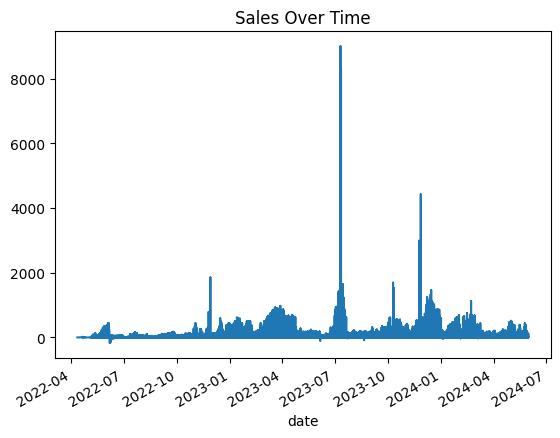

Duplicate dates found in the index. Removing duplicates...


In [16]:
# Plot sales over time
df['units'].plot(title='Sales Over Time')
plt.show()

# Check for duplicates and handle them before resampling
if df.index.duplicated().any():
    print("Duplicate dates found in the index. Removing duplicates...")
    df = df[~df.index.duplicated(keep='first')]  # Keep the first occurrence of each date


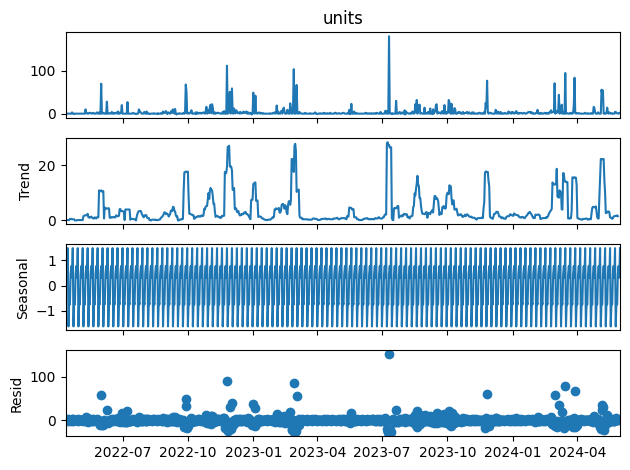

In [17]:
# Infer the frequency of the time series, assuming daily data
df = df.resample('D').asfreq()  # Now resample after handling duplicates

# Seasonal Decompose, specifying the period if known
result = seasonal_decompose(df['units'], model='additive', period=7) # Assuming weekly seasonality, adjust if needed
result.plot()
plt.show()

In [18]:
# Fit an ARIMA model
model = ARIMA(df['units'], order=(1, 1, 1))  # These parameters (p, d, q) need tuning
fitted_model = model.fit()

# Forecasting
forecast = fitted_model.forecast(steps=30)  # Forecast the next 30 days
print(forecast)

2024-06-01    3.667199
2024-06-02    3.815658
2024-06-03    3.828878
2024-06-04    3.830055
2024-06-05    3.830160
2024-06-06    3.830169
2024-06-07    3.830170
2024-06-08    3.830170
2024-06-09    3.830170
2024-06-10    3.830170
2024-06-11    3.830170
2024-06-12    3.830170
2024-06-13    3.830170
2024-06-14    3.830170
2024-06-15    3.830170
2024-06-16    3.830170
2024-06-17    3.830170
2024-06-18    3.830170
2024-06-19    3.830170
2024-06-20    3.830170
2024-06-21    3.830170
2024-06-22    3.830170
2024-06-23    3.830170
2024-06-24    3.830170
2024-06-25    3.830170
2024-06-26    3.830170
2024-06-27    3.830170
2024-06-28    3.830170
2024-06-29    3.830170
2024-06-30    3.830170
Freq: D, Name: predicted_mean, dtype: float64
